# IA 340 Mini Project, Max Burkhart

In [1]:
import pandas as pd

df = pd.read_csv('s3://ia-mini-project-cow/Inter-StateWarData_v4.0.csv')
df.head()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,WarNum,WarName,WarType,ccode,StateName,Side,StartMonth1,StartDay1,StartYear1,EndMonth1,...,EndMonth2,EndDay2,EndYear2,TransFrom,WhereFought,Initiator,Outcome,TransTo,BatDeath,Version
0,1,Franco-Spanish War,1,230,Spain,2,4,7,1823,11,...,-8,-8,-8,503,2,2,2,-8,600,4
1,1,Franco-Spanish War,1,220,France,1,4,7,1823,11,...,-8,-8,-8,503,2,1,1,-8,400,4
2,4,First Russo-Turkish,1,640,Ottoman Empire,2,4,26,1828,9,...,-8,-8,-8,506,11,2,2,-8,80000,4
3,4,First Russo-Turkish,1,365,Russia,1,4,26,1828,9,...,-8,-8,-8,506,11,1,1,-8,50000,4
4,7,Mexican-American,1,70,Mexico,2,4,25,1846,9,...,-8,-8,-8,-8,1,2,2,-8,6000,4


This dataset records every inter-state war from 1823-2007. To be categorized as an inter-state war, as opposed to an intra-state war, that is, fighting which takes place within a single states borders, an inter-state war is defined as fighting between two or more states. There are additional criteria as well for a conflict to be listed on this database. The inter-state war must involve organized armed forces that are capable of, what scholars who contributed to this dataset define as, "effective resistance". Furthermore, the war must incur at least 1,000 battle-related deaths. According to the scholars at the Correlates of War project, there have been 227 incidents of inter-state war sicne 1823- a period that could roughly be defined as the post-Napoleonic age.

The research question guiding this work is simply, "What can an analysis of all inter-state wars in the post-Napoleonic age tell us about factors contributing to the causes of inter-state war?" It is likely that the data alone will not be able to answer this question, and it is also likely that there are multiple variables contributing to inter-state conflict. Scholars in the social sciences have queried the idea of the causes of war, and in the decades since the serious study of this topic began, various theories have emerged. For example, Marxists focus on class frictions as the causes of conflict, while in Thucydides’ History of the Peloponnesian War, the cause of war boils down to the expansion of territory due to its protectionist qualities for the state. These are just a few examples, and they date back centuries before widespread access to technology allowed for empirical collection and analysis in the causes of war, leading to even more theories about the causes of war.

In sum, using the database at hand combined with a general understanding of history, the research question errs on the side of contributing to theories on the causes of war instead of reaching a definite answer.

Cleaning the data was relativly straight forwards, in part because most of the variables tht would have required cleaning, such as where the war was faught or what the outcome was, were not inluded in this data analysis. For a larger project (a major projects instead of a mini project), where more data is required, those variables would have likely been utitilized. 

Correlation Matrix:
               DurationYears  BatDeath  WhereFought
DurationYears       1.000000  0.288122     0.264375
BatDeath            0.288122  1.000000     0.288353
WhereFought         0.264375  0.288353     1.000000


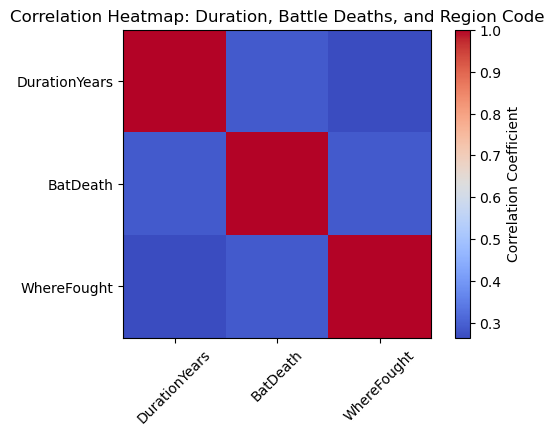

In [5]:
import pandas as pd

numeric_cols = ["DurationYears", "BatDeath", "WhereFought"]

correlation_matrix = df[numeric_cols].corr(method='pearson')

print("Correlation Matrix:")
print(correlation_matrix)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Heatmap: Duration, Battle Deaths, and Region Code")
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.show()


Building this correlation table before the construction of other data visualizations is important as to define the limits of this analysis. According to the correlation matrix above there exist no statistically significant relationship (all below .3) between three core variables in the data set. The fact that battle deaths, where the inter-state war was faught, and the duration of the war are not correlated, and thus not caused, by one another tells us important info. However, it is important to consider how the outliers are effecting the correlation. As visualized in the the graph titled 'War Duration vs Battle-Related Deaths" there are two major outliers present. Let us remove these and see how the correlation table changes, if at all.

Correlation Matrix (WWII wars removed):
               DurationYears  BatDeath  WhereFought
DurationYears       1.000000  0.541266     0.140747
BatDeath            0.541266  1.000000     0.111535
WhereFought         0.140747  0.111535     1.000000


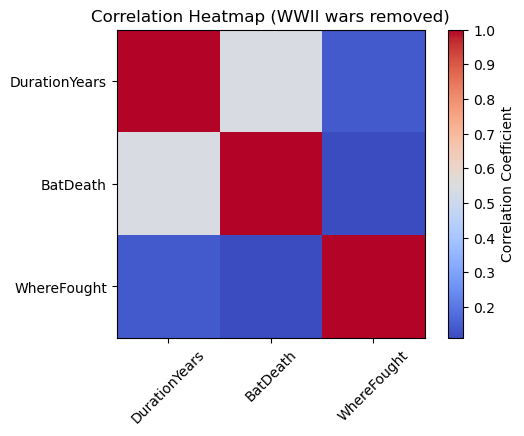

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# List the WWII wars by name (adjust names exactly as in your dataset)
wwii_wars = ["World War I", "World War II"]  # replace "World War I" if needed

# Filter out the WWII wars
df_no_outliers = df[~df["WarName"].isin(wwii_wars)]

# Select numeric columns
numeric_cols = ["DurationYears", "BatDeath", "WhereFought"]

# Compute correlation matrix
correlation_matrix = df_no_outliers[numeric_cols].corr(method='pearson')

# Print correlation matrix
print("Correlation Matrix (WWII wars removed):")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6,4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Heatmap (WWII wars removed)")
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.show()


With the major wars removed the table is now more representative of inter-state conflict. Still, even with outliers removed, no correlation exists between the three variables. Thre correlation between where the war fought and the duration, as well as battle deaths and where the war was fought decreased. However, the duration of the war and the number of battle deaths increased from .29 (with outlier) to .54 (outlier removed). The correlation between these two is now a moderate positive relationship, meaning wars that extend for longer periods of time tend to incur more deaths. With some consideration, this correlation makes sense. Wars inherintly cause death, and the longer they are active the more chances the two sides have to kill one another. With this said, however, the correlation is .54, meaning the variables are limited in their predictive power. Another weakness of the table is that it does not reveal what variable causes the correlation. Does war duration lead to battle deaths, or does battle deaths lead to war duration? 

Matplotlib is building the font cache; this may take a moment.


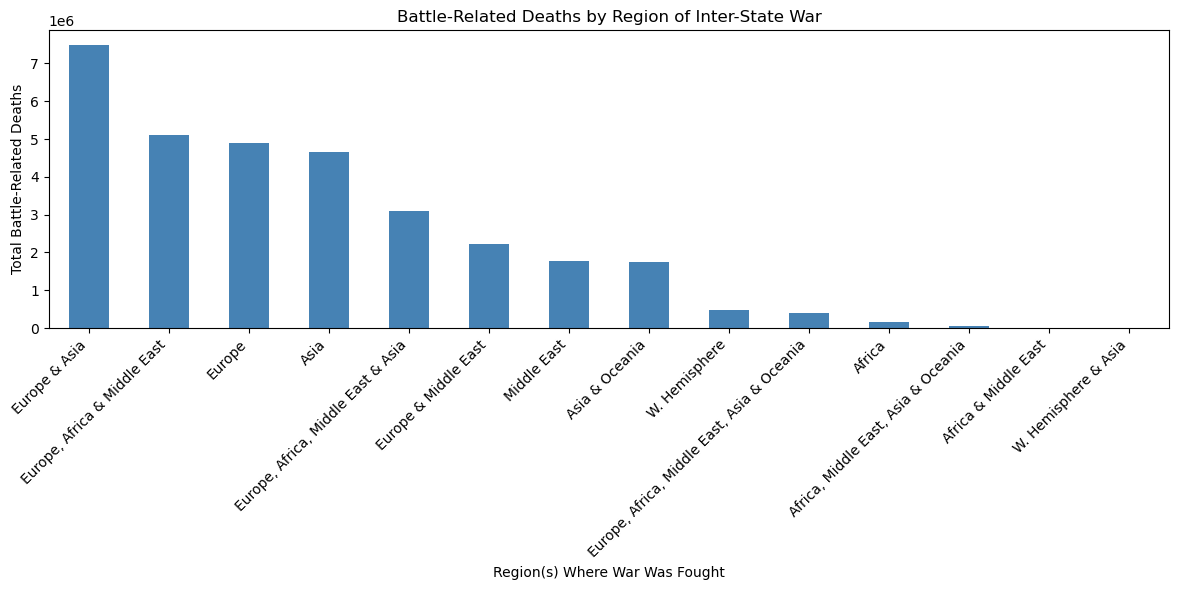

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('s3://ia-mini-project-cow/Inter-StateWarData_v4.0.csv')

region_map = {
    1: "W. Hemisphere",
    2: "Europe",
    4: "Africa",
    6: "Middle East",
    7: "Asia",
    9: "Oceania",
    11: "Europe & Middle East",
    12: "Europe & Asia",
    13: "W. Hemisphere & Asia",
    14: "Europe, Africa & Middle East",
    15: "Europe, Africa, Middle East & Asia",
    16: "Africa, Middle East, Asia & Oceania",
    17: "Asia & Oceania",
    18: "Africa & Middle East",
    19: "Europe, Africa, Middle East, Asia & Oceania"
}

df["Region"] = df["WhereFought"].map(region_map)

region_deaths = df.groupby("Region")["BatDeath"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
region_deaths.plot(kind='bar', color='steelblue')
plt.title("Battle-Related Deaths by Region of Inter-State War")
plt.xlabel("Region(s) Where War Was Fought")
plt.ylabel("Total Battle-Related Deaths")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This graph simply communicates that wars faught in Europe and Asia in the post-Napoleonic age resulted in the most battle related deaths. 

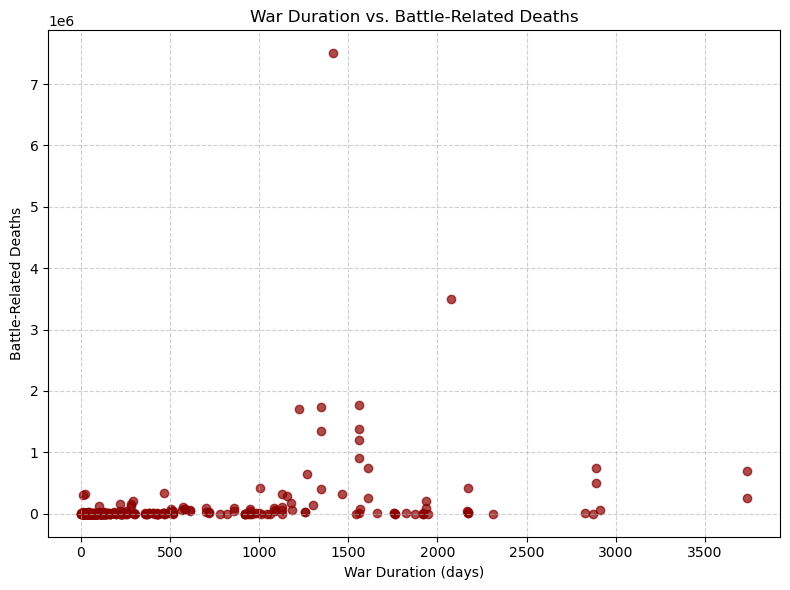

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('s3://ia-mini-project-cow/Inter-StateWarData_v4.0.csv')

df = df.replace(-8, pd.NA)

df["StartDate"] = pd.to_datetime(dict(year=df["StartYear1"], month=df["StartMonth1"], day=df["StartDay1"]), errors='coerce')
df["EndDate"] = pd.to_datetime(dict(year=df["EndYear1"], month=df["EndMonth1"], day=df["EndDay1"]), errors='coerce')

df["DurationDays"] = (df["EndDate"] - df["StartDate"]).dt.days

df = df.dropna(subset=["DurationDays", "BatDeath"])

plt.figure(figsize=(8,6))
plt.scatter(df["DurationDays"], df["BatDeath"], alpha=0.7, color='darkred')
plt.title("War Duration vs. Battle-Related Deaths")
plt.xlabel("War Duration (days)")
plt.ylabel("Battle-Related Deaths")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


The data in this graph, measuring battle related deaths with war duration, communicates key important facts. First, as noted above in the correlation table, the correlation between these two variables was the strongest at .54, and with careful scanning of the graph we can see the concentration of red dots in the bottom left. 

In the code used to create this graph, the line "df = df.replace(-8, pd.NA)" was necessary becuase in the orirignal dataset -8 was used as a placeholder for when the variable did not apply. In this case, -8 was a placeholder for if the inter-state war was restarted after a period of non-action, and because in most cases wars were faught without a second episode of violence after a break in fighting, the value -8 was present frequently in the data set. Naturally this caused problems when writing code and required me to remove it.

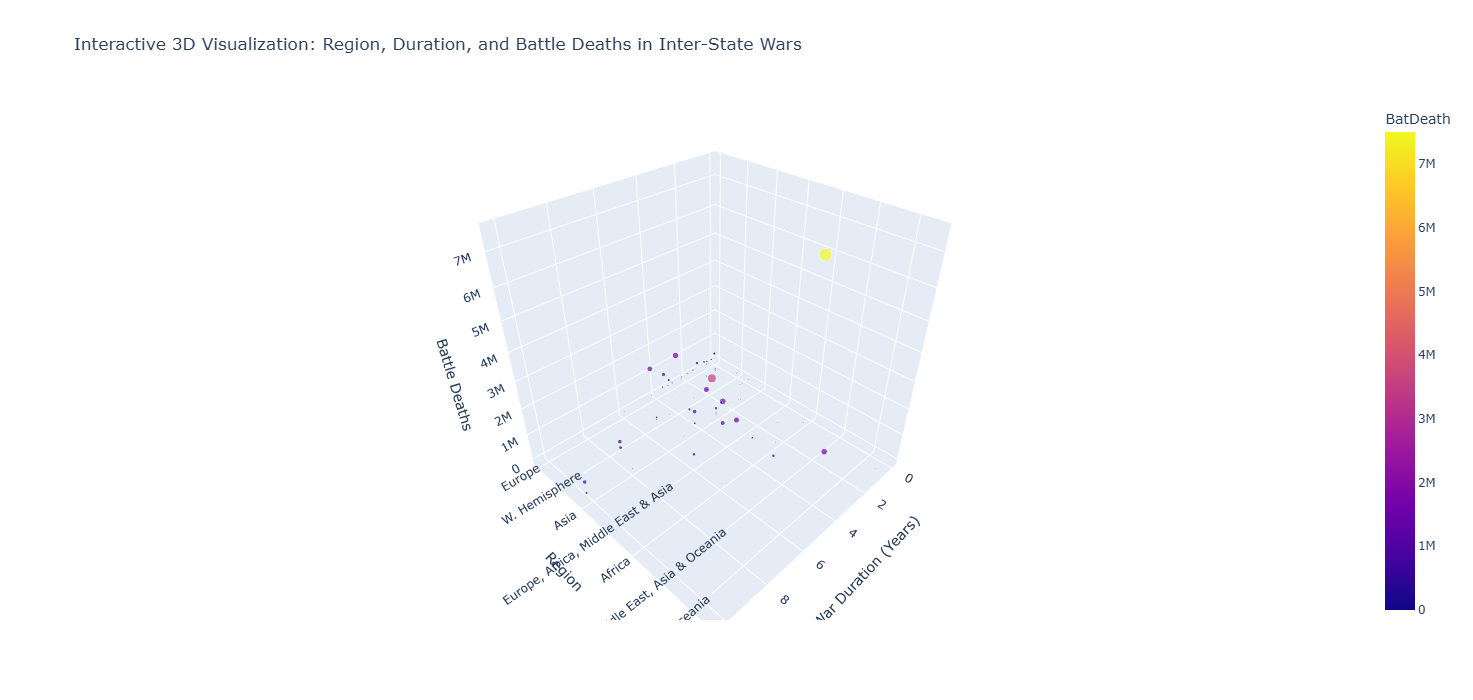

In [4]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('s3://ia-mini-project-cow/Inter-StateWarData_v4.0.csv')

df = df.replace([-8, -9], pd.NA)

region_map = {
    1: "W. Hemisphere",
    2: "Europe",
    4: "Africa",
    6: "Middle East",
    7: "Asia",
    9: "Oceania",
    11: "Europe & Middle East",
    12: "Europe & Asia",
    13: "W. Hemisphere & Asia",
    14: "Europe, Africa & Middle East",
    15: "Europe, Africa, Middle East & Asia",
    16: "Africa, Middle East, Asia & Oceania",
    17: "Asia & Oceania",
    18: "Africa & Middle East",
    19: "Europe, Africa, Middle East, Asia & Oceania"
}

df["Region"] = df["WhereFought"].map(region_map)

df["StartDate"] = pd.to_datetime(dict(year=df["StartYear1"], month=df["StartMonth1"], day=df["StartDay1"]), errors='coerce')
df["EndDate"] = pd.to_datetime(dict(year=df["EndYear1"], month=df["EndMonth1"], day=df["EndDay1"]), errors='coerce')
df["DurationYears"] = (df["EndDate"] - df["StartDate"]).dt.days / 365

df = df.dropna(subset=["DurationYears", "BatDeath", "Region"])

df["BatDeath"] = pd.to_numeric(df["BatDeath"], errors="coerce")
df = df[df["BatDeath"] > 0]

fig = px.scatter_3d(
    df,
    x="DurationYears",
    y="Region",
    z="BatDeath",
    color="BatDeath",
    hover_name="WarName",
    title="Interactive 3D Visualization: Region, Duration, and Battle Deaths in Inter-State Wars",
    color_continuous_scale="Plasma",
    size="BatDeath",
    height=700
)

fig.update_layout(
    scene=dict(
        xaxis_title='War Duration (Years)',
        yaxis_title='Region',
        zaxis_title='Battle Deaths'
    )
)

fig.show()


This 3D graph displays three variables: battle deaths, war duration, and region. Being able to toggle with the view of the graph is helpful for internalizing the data, and in the case that I was presenting this information to a policy maker or a younger student this display would likely grab their attention. Going back to the first correlation table, this graph shows a concentration of conflict that it as the intersection of of a war duration of between 0-4 years, having occured in Europe, and resulting in 500,000 or less battlefield deaths. Looking at the common variables of inter-state conflict reveals the wars that were not common in the past ~200 years. These outlier wars either lasted relativly long periods or cost great human suffering. Based on this interactive graph, the interstate wars fitting these variables include both world wars, the Third Sino-Japanese war (750,000 dead), the Vietnam war (>10 years in active conflict), and the Iran-Iraq (8 years, 750,000 dead). Again, to restate, these conflicts were on the greater end of the spectrum compared to other inter-state conflicts in the data due to their death toll and years in active coflict.